In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=1
alpha = .35
beta = .442
delta = .6415
sigma = 3.
nvec= np.array([1.,1.,0.2])
r= 0.05
SS_tol=1e-8
p= (beta, sigma, nvec, A, alpha, delta, SS_tol)

# Chapter 2
## Exercise 1

In [3]:
def get_K(b,p):
    K=sum(b)
    return K
def get_L(nvec,p):
    L=sum(nvec)
    return L
def get_r(L,K,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    r=alpha*A*(L/K)**(1-alpha)-delta
    return r

def get_w(L,K,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    w=(1-alpha)*A*(K/L)**(alpha)
    return w

def get_C(nvec,w,r,b,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    c=np.zeros(3)
    c[0]=w*nvec[0]-b[0]
    c[1]=w*nvec[1]+(1+r)*b[0]-b[1]
    c[2]=w*nvec[2]+(1+r)*b[1]
    return c

def get_uprime(c,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    uprime=c**(-sigma)
    return uprime

def Equation_solve(bvec_guess, nvec,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    K=get_K(bvec_guess,p)
    L=get_L(nvec,p)
    r=get_r(L,K,p)
    w=get_w(L,K,p)
    c=get_C(nvec,w,r,bvec_guess,p)
    return K,L,r,w,c

In [4]:
def feasible(p, bvec_guess, nvec):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    
    K,L,r,w,c=Equation_solve(bvec_guess,nvec,p)
    
    #initialize
    K_constr = True
    
    if K<=0:
        K_cnstr = True
    else:
        K_cnstr = False
    
    if K_cnstr==True:
        print("Capital constraint violated")
    
    #initialize
    c_cnstr= np.array([True, False, False])
    
    for ii in range(len(c)):
        if c[ii]<=0:
            c_cnstr[ii]=True
        elif c[ii]>0:
            c_cnstr[ii]=False
    if any(c_cnstr):
        print("Consumption constraint violated")
            
    b_cnstr = np.array([False, False])
    for ii in range(len(c_cnstr)):
        if ii== 0 and c_cnstr[ii]==True:
            b_cnstr[0]=True
        if ii==1 and c_cnstr[ii]==True:
            b_cnstr[0]=True
            b_cnstr[1]=True
        elif ii==3 and c_cnstr[ii]==True:
            b_cnstr[1]==True
    if any(b_cnstr):
        print("Borrowing constraint violated")
    
    if not any(b_cnstr) and not any(c_cnstr) and K_cnstr==False:
        print("No constraint violated")

    return b_cnstr, c_cnstr, K_cnstr

In [5]:
#c
bvec_guess=np.array([1.0, 1.2])
feasible(p, bvec_guess, nvec)

Consumption constraint violated
Borrowing constraint violated


(array([ True, False]), array([ True, False, False]), False)

In [6]:
#b
bvec_guess=np.array([0.06, -0.001])
feasible(p, bvec_guess,nvec)

No constraint violated


(array([False, False]), array([False, False, False]), False)

In [7]:
#c
bvec_guess = np.array([0.1, 0.1])
feasible(p, bvec_guess,nvec)

No constraint violated


(array([False, False]), array([False, False, False]), False)

In [8]:
import time
import scipy.optimize as opt

In [9]:
def get_EulerErrors(bvec_guess,nvec,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    
    K=get_K(bvec_guess,p)
    L=get_L(nvec,p)
    r=get_r(L,K,p)
    w=get_w(L,K,p)
    c=get_C(nvec,w,r,bvec_guess,p)
    err1=beta*(1+r)*get_uprime(c[2],p)-get_uprime(c[1],p)
    err2=beta*(1+r)*get_uprime(c[1],p)-get_uprime(c[0],p)
    
    return err1,err2

In [10]:
def get_SS(bvec_guess, nvec,p, SS_graphs=False):
    start_time = time.clock()
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    solution = opt.root(get_EulerErrors, bvec_guess,args=(nvec,p), tol = SS_tol)
    b_ss=solution.x
    L=get_L(nvec,p)
    K_ss=get_K(b_ss,p)
    r_ss=get_r(L,K_ss,p)
    w_ss=get_w(L,K_ss,p)
    c_ss=get_C(nvec,w_ss,r_ss,b_ss,p)
    Y_ss=c_ss+delta*K_ss
    err1,err2=get_EulerErrors(b_ss,nvec,p)
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'EulErr_ss': err1, 'RCerr_ss': err2,'ss_time': ss_time}
    
    if SS_graphs==True:
        period=np.array([1,2,3])
        plt.plot(period,c_ss, label="Consumption")
        plt.plot(period[1:],b_ss, label="Savings")
        plt.legend()
        plt.xlabel("Life-Period")
        plt.ylabel("level")
        plt.show()
    
    return ss_output

C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


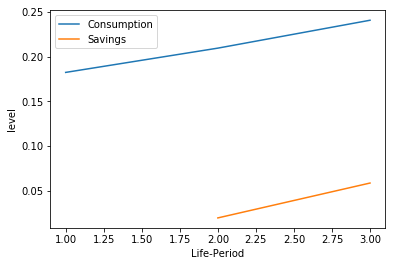

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': array([0.23227183, 0.25947439, 0.29073357]),
 'EulErr_ss': -2.5437429940211587e-12,
 'RCerr_ss': 1.2505552149377763e-12,
 'ss_time': 0.001483799999999924}

In [11]:
A=1
alpha = .35
beta = .442
delta = .6415
sigma = 3.
nvec= np.array([1.,1.,0.2])
p = (beta, sigma, nvec, A, alpha, delta, SS_tol)
get_SS(bvec_guess, nvec,p, SS_graphs=True)

C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


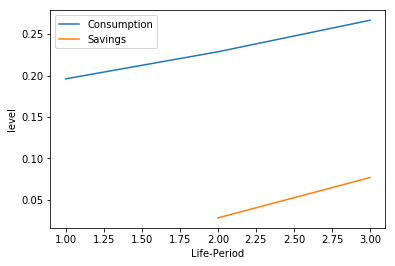

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': array([0.26335996, 0.29600062, 0.33407775]),
 'EulErr_ss': -2.4726887204451486e-12,
 'RCerr_ss': -6.963318810448982e-12,
 'ss_time': 0.002154499999999615}

In [12]:
A=1
alpha = .35
beta = .55
delta = .6415
sigma = 3.
nvec= np.array([1.,1.,0.2])
p = (beta, sigma, nvec, A, alpha, delta, SS_tol)
get_SS(bvec_guess, nvec,p, SS_graphs=True)

Intuition: As beta rises, agents become more "patient" and hence, more capital can be accumulated, which in turn increases aggregate output and allows overall for more consumption in an economy in the steady state.

## Exercise 3:
Note: Uta kindly took her time to help me getting it to run, as I sat over the same bug for hours. 

In [13]:
#Time path iteration
def get_C2(n,w,r,b2,b3,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    c=np.zeros(2)
    c[0]=w[1]*n[1]+(1+r[0])*b2-b3
    c[1]=w[2]*n[2]+(1+r[1])*b3
    return c

def EE2(b3,b2,n,w,r,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    c=get_C2(n,w,r,b2,b3,p)
    err2=beta*(1+r[1])*get_uprime(c[1],p)-get_uprime(c[0],p)
    return err2

def get_C3(nvec,w,r,b,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    c=np.zeros(3)
    c[0]=w[0]*nvec[0]-b[0]
    c[1]=w[1]*nvec[1]+(1+r[0])*b[0]-b[1]
    c[2]=w[2]*nvec[2]+(1+r[1])*b[1]
    return c

def EE1(bvec_guess,n,w,r,p):
    (beta, sigma, nvec, A, alpha, delta, SS_tol)=p
    c=get_C3(n,w,r,bvec_guess,p)
    err2=get_uprime(c[0],p)-beta*(1+r[1])*get_uprime(c[1],p)
    err1=get_uprime(c[1],p)-beta*(1+r[2])*get_uprime(c[2],p)
    return err1,err2

def tpi(b_init,Kpath,eps,tguess,bvec_guess,nvec):
    K=np.zeros(tguess)
    K[0]=Kpath[0]
    bo=np.zeros(tguess+2)
    bm=np.zeros(tguess+2)
    b2=b_init[0]
    L=get_L(nvec,p)
    for j in range(0,maxiter):
        Kappend=np.append(Kpath,[Kpath[tguess-1],Kpath[tguess-1]])
        r=get_r(L,Kappend,p)
        w=get_w(L,Kappend,p)
        for t in range(0,tguess-1):
            rt=np.array([r[t],r[t+1],r[t+2]])
            wt=np.array([w[t],w[t+1],w[t+2]])
            res=opt.root(EE2, bvec_guess[0],args=(b2,nvec,wt,rt,p), tol = 1e-10)
            bo[0]=res.x
            b= opt.root(EE1, bvec_guess,args=(nvec,wt,rt,p), tol = 1e-10)
            bm[t]=b.x[0]
            K[t+1]=bo[t]+bm[t]
            bo[t+1]=b.x[1]
            
        err=np.sqrt(sum((Kpath-K)**2))
        if err>eps:
            Kpath=Kpath*(1-xsi)+K*(xsi)
        else:
            print("CONVERGENCE ACHIEVED at Iteration "+str(j))
            break
            
    return Kpath,err,j,r,w

C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


CONVERGENCE ACHIEVED at Iteration 36
K_Path [0.10709353 0.10023821 0.10287566 0.10334692 0.10392307 0.10427069
 0.10451711 0.10468382 0.10479791 0.10487568 0.10492874 0.10496491
 0.10498958 0.10500639 0.10501785 0.10502566 0.10503098 0.10503461
 0.10503708 0.10503876 0.10503991 0.1050407  0.10504123 0.10504159
 0.10504184 0.10504201 0.10504212 0.1050422  0.10504226 0.10504229
 0.10504232 0.10504233 0.10504235 0.10504235 0.10504236 0.10504236
 0.10504236 0.10504237 0.10504237 0.10504237 0.10504237 0.10504237
 0.10504237 0.10504237 0.10504237 0.10504237 0.10504237 0.10504237
 0.10504237 0.10504237]
Euler Error 7.393085478147242e-10


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

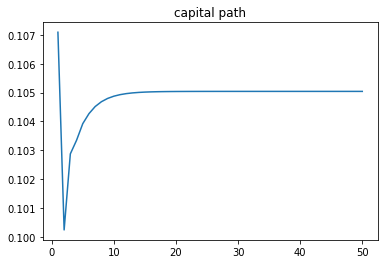

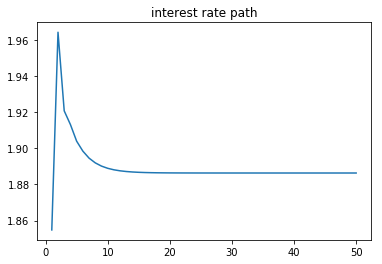

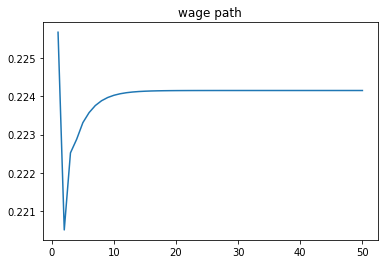

In [14]:
beta=0.55
tguess=50
bvec_guess = np.array([.1, .1])
p = (beta, sigma, nvec, A, alpha, delta, SS_tol)
results = get_SS(bvec_guess, nvec,p, SS_graphs=False)

b_ss=results['b_ss']
K_ss=results['K_ss']
b_init=np.array([0.8*b_ss[0],1.1*b_ss[1]])
K_init=get_K(b_init,p)
xsi=0.8
eps=1e-9
maxiter=1000
nvec=np.array([1.0,1.0,.2])

Kguess=np.linspace(K_init,K_ss,tguess )
Kout, err,j,rpath,wpath=tpi(b_init,Kguess,eps,tguess,bvec_guess ,nvec)
print("K_Path "+ str(Kout))
print("Euler Error " + str(err))

timeax=np.linspace(1,tguess,num=tguess)
plt.figure(1)
plt.plot(timeax, Kout)
plt.title("capital path")
plt.figure(2)
plt.plot(timeax, rpath[0:tguess])
plt.title("interest rate path")
plt.figure(3)
plt.plot(timeax, wpath[0:tguess])
plt.title("wage path")

time_toSS=(Kout-K_ss)<0.00001
np.where(time_toSS)[0]